# Some Variations of Banach's Matchbox Problem

Banach's matchbox problem is a good entry point into stochastic stopping problems. A man buys two matchbooks and puts one in each of his two pockets. He then selects a matchbox at random from either pocket, uses a single match, and then returns the matchbox to the same pocket, absentmindedly not noticing if he has taken the last match. After a certain number of draws, an empty matchbox is selected and found emptied. What is the probability of $k$ matches in the remaining matchbox? 

The problem is given two matchbooks containing $n$ matches each and with a matchbook placed in both the left and right pockets, if a person reaches into one or the other pocket at random with equal probability, what is the probability of there being $k$ matches in the other pocket when the matchbook in the selected pocket is found to be empty?  That is, the person keeps reaching alternatively and at random to sample a match from either pocket until one of the pockets is exhausted of matches.

This is easy to code up in Python using a generator:

In [10]:
import random

random.seed(12345)
def step(n=4):
  'keep track of remaining matches in each matchbook'
  a = b = n
  while a>0 and b>0:
    if random.randint(0,1):
        a-=1
    else:
        b-=1
    yield (a,b)

Thus, suppose there are $n=4$ matches in each matchbook, then a valid sequence of draws from the `(left,right`) pocket is the following:

`[(4, 3), (4, 2), (3, 2), (3, 1), (3, 0)]`

This means that the first draw is from the right pocket leaving `3` matches there and `4` matches in the left pocket. The next draw again
samples a match from the right pocket leaving `2` matches there and `4` in the left pocket. For the following draw, the left pocket is chosen leaving `3` matches there and `2` matches in the right pocket. This continues until the right pocket is emptied `(3,0)`. We can draw this sequence using the following code:

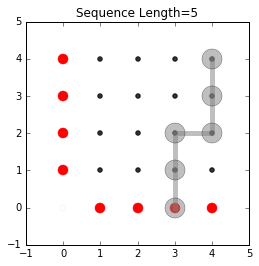

In [11]:
%matplotlib inline
from matplotlib.pylab import subplots,mgrid

def draw_grid(n=4):
    'draw square grid of `n` dimensions'
    fig,ax = subplots()
    i,j=mgrid[0:n+1,0:n+1]
    ax.scatter(i.flat,j.flat,alpha=.8,color='black')
    ax.set_aspect(1)
    ax.plot(0,0,'ow',mec='w'); # remove origin
    ax.plot([0,]*4,range(1,5),'or',mec='r',ms=10)
    ax.plot(range(1,5),[0,]*4,'or',mec='r',ms=10)
    return ax

def draw_path(seq,ax,color='gray',alpha=0.5):
    x,y=zip(*seq)
    n = max(seq[0])
    ax.plot((n,)+x,(n,)+y,marker='o',markersize=20,
            alpha=alpha,color=color,lw=5)
    ax.set_title('Sequence Length=%d'%(len(x)))    
            
ax = draw_grid()
draw_path([(4, 3), (4, 2), (3, 2), (3, 1), (3, 0)],ax)

In the figure above, the red circles indicate the termination points where one of the pockets has been emptied. The `(4,4)` point is the starting point with incremental steps moving down and to the left until one of the red circles is encountered. The length of the sequence is indicated in the title. In this case it took five draws in total to exhaust one of the matchbooks and terminate the sequence.

The classical matchbox problem is to find the probability of termination at a particular circle. For example, what is the probability that the sequence terminates with one match remaining in the other matchbook? In the figure above, this means terminating at `(1,0)` or `(0,1)`.

Specifically, termination at `(1,0)` means accumulating four steps down and three steps left in any sequence. This is the same as the $n$ *choose* $k$ binomial coefficient $\texttt{Binom}(n,k)$. We can compute this using `scipy` as the following with $n=7,k=3$:

In [12]:
from scipy.misc import comb
print comb(7,3,exact=True)

35


The problem with this approach is that we can accidentally count paths that would have terminated earlier. For example,

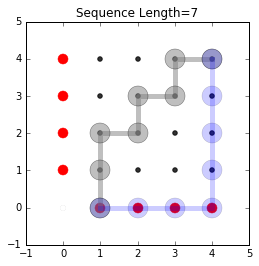

In [13]:
ax = draw_grid()
draw_path([(3, 4), (3, 3), (2, 3), (2, 2), (1, 2), (1, 1), (1, 0)],ax)
draw_path([(4,3), (4, 2), (4, 1), (4, 0), (3, 0), (2, 0), (1, 0)],ax,'blue',.2)

The blue path would never have gotten so long because it would have encountered the termination point at `(4,0)`. Thus, this straight-forward counting scheme would over-count by including these paths. The following figure shows these valid paths that terminate at `(1,0)`:

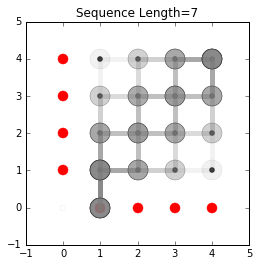

In [14]:
paths=[[(3, 4),(2, 4),(1, 4),(1, 3),(1, 2),(1, 1),(1, 0)],
[(3, 4),(2, 4),(2, 3),(1, 3),(1, 2),(1, 1),(1, 0)],
[(3, 4),(2, 4),(2, 3),(2, 2),(1, 2),(1, 1),(1, 0)],
[(3, 4),(2, 4),(2, 3),(2, 2),(2, 1),(1, 1),(1, 0)],
[(3, 4),(3, 3),(2, 3),(1, 3),(1, 2),(1, 1),(1, 0)],
[(3, 4),(3, 3),(2, 3),(2, 2),(1, 2),(1, 1),(1, 0)],
[(3, 4),(3, 3),(2, 3),(2, 2),(2, 1),(1, 1),(1, 0)],
[(3, 4),(3, 3),(3, 2),(2, 2),(1, 2),(1, 1),(1, 0)],
[(3, 4),(3, 3),(3, 2),(2, 2),(2, 1),(1, 1),(1, 0)],
[(3, 4),(3, 3),(3, 2),(3, 1),(2, 1),(1, 1),(1, 0)],
[(4, 3),(3, 3),(2, 3),(1, 3),(1, 2),(1, 1),(1, 0)],
[(4, 3),(3, 3),(2, 3),(2, 2),(1, 2),(1, 1),(1, 0)],
[(4, 3),(3, 3),(2, 3),(2, 2),(2, 1),(1, 1),(1, 0)],
[(4, 3),(3, 3),(3, 2),(2, 2),(1, 2),(1, 1),(1, 0)],
[(4, 3),(3, 3),(3, 2),(2, 2),(2, 1),(1, 1),(1, 0)],
[(4, 3),(3, 3),(3, 2),(3, 1),(2, 1),(1, 1),(1, 0)],
[(4, 3),(4, 2),(3, 2),(2, 2),(1, 2),(1, 1),(1, 0)],
[(4, 3),(4, 2),(3, 2),(2, 2),(2, 1),(1, 1),(1, 0)],
[(4, 3),(4, 2),(3, 2),(3, 1),(2, 1),(1, 1),(1, 0)],
[(4, 3),(4, 2),(4, 1),(3, 1),(2, 1),(1, 1),(1, 0)]]

ax = draw_grid()
for i in paths:
    draw_path(i,ax,alpha=.1)
   

Let's change our perspective slightly. Instead let's examine the probability of a sequence of a certain length and see if we can use that to answer the classic question. To start with, the following figure shows valid four-long sequences. The diagonal elements are indicated in green and these are the termination points for all four-long sequences. There are $2^4=16$ such sequences.

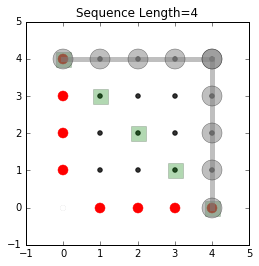

In [44]:
ax = draw_grid()
for i in zip(range(5)[::-1],range(5)):
    ax.plot(i[0],i[1],'sg',ms=15,alpha=.3)
draw_path([(3,4),(2,4),(1,4),(0,4)],ax)
draw_path([(4,3),(4,2),(4,1),(4,0)],ax)

Because only two of the sixteen valid  sequences result in termination, the probability of termination with a four-long sequence is $P_4 = \frac{2}{16}= \frac{1}{8}$. Now let's examine the diagonal elements with the following labels.

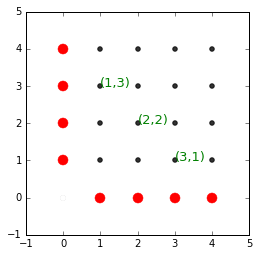

In [61]:
ax = draw_grid()
for i in zip(range(1,4)[::-1],range(1,4)):
    ax.text(i[0],i[1],'(%d,%d)'%i,fontsize=13,color='g')

We can use the labels to compute the number of paths that terminate at each of the diagonal elements.

| Label | Number of Paths|
|-------|----------------|
| (1,3) | $\texttt{binom}(4,1)=4$|
| (2,2) | $\texttt{binom}(4,2)=6$|
| (3,1) | $\texttt{binom}(4,1)=4$|

This means that there are `16-2=4+6+4=14` paths out of the initial group of `16` that have yet to terminate. Now, let's consider sequences of length five.

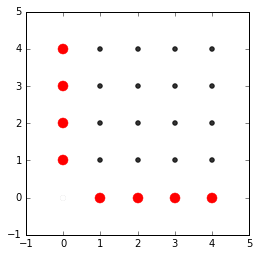

In [62]:
ax = draw_grid()

## Length of Sequence

the probability of a sequence that is four units long that terminates is shown below

Now following this pattern, all we have to do is count for all the other termination points.


|termination point  | num of paths|
|--------------------:|-------------|
|`(4,0)`|1|
|`(0,4)`|1|
|`(3,0)` | 5|
|`(0,3)` | 5|
|`(2,0)` | 5|
|`(0,2)` | 5|
|`(1,0)` | 35|
|`(0,1)` | 35|